In [1]:
%%html
<style>
table {float:left}
h1 {text-align:center}
</style>

## Notebook Description

|Date |Description|
|:------|------|
|March 29th, 2021 | Created |



# Build a performing machine learning algorithm

## 1. Importing Libraries and Modules
We imported
>- **sklearn** methods for building the machine learning model. 
>- **pandas, numpy,** and **scipy** to effectively manipulate large dataset.
>- **matplotlib,** and **seaborn** for data visualization.
>- **warnings** to supress python warning.

In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
sb.set(font_scale=1.1)
plt.style.use('seaborn-darkgrid')

# About Dataset - [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+Disease)
>## (Processed.cleveland.data)
This database contains **has 14 attributes, and is a subset taken from a bigger data set**, which relates to the presence of heart disease in a person and various conditions in their body. The "num" field refers to the presence of heart disease in the patient. It is integer value from 0 (no presence) to 1,2,3,4 (presence).


Detail of 14 attritutes is given below:<br>
**1.**  age (years)<br>
**2.** sex (1 = male; 0 = female)<br>
**3.** cp (chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic)<br>
**4.** trestbps (resting blood pressure (in mm Hg on admission to the hospital) )<br>
**5.** chol (serum cholestoral in mg/dl)<br>
**6.** fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
**7.** restecg (resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
**8.** thalach (maximum heart rate achieved)<br>
**9.** exang (exercise induced angina) (1 = yes; 0 = no)<br>
**10.** oldpeak (ST depression induced by exercise relative to rest)<br>
**11.** slope (the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping )<br>
**12.** ca (number of major vessels (0-3) colored by flourosopy)<br>
**13.** thal (3=normal; 6=fixed defect; 7=reversable defect)<br>
**14.** num (diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing<br>

## 2. Data preparation
We will be using several data cleaning methods such as 
>- querying data, 
>- cleaning your data with missing values and outliers and 
>- formating it to prepare our data for the machine learning model. 

### Querying data
The following code demonstartes how we read a data file and store it into a variable named and add headers to each column representing the 14 attributes of the data set for better readability and understanding of the data. 

In [3]:
data =  pd.read_csv('processed.cleveland.data', header=None)   # Loading the dataset into a data variable.
data.columns = ["age","sex","cp","trestbps","chol","fbs","restecg",
                    "thalach","exang","oldpeak","slope","ca","thal","num"]  # Assigning columns name to dataframe.

print("Total no of rows:",data.shape[0])
print("Total no of columns:",data.shape[1])
data.head(10)

Total no of rows: 303
Total no of columns: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


After adding headers to the column we see that most of the data is float type. We further use **.isna() & .info()** method to find if the data set has any null values and their types respectively. <br> At a closer look we find that the data has 303 entries with no null values, but two of the rows are in string type. A deeper search leads to finding out **'?'** sign in the two columns namely **"ca"** & **"thal"**, which needs to be dealt with. <br> An example for "?" is shown using **.tail()** method at **$302^{th}$ index** which hppens to reveal the missing value.

In [4]:
# Checking if any column has null value in it
print(data.isna().sum(),"\n")
print(data.info())
data.tail()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Removing missing values
We first replace the **"?"** with **NaN** value and then converting them into **float** values matching with the rest of the data. There are only 6 NaN values in whole dataset and the rows consisting NaN values are removed using function **.dropna()** while leaving **297** rows behind . <br>Removing several rows creates a new column under the name **"Index"** which stores the original index number of the entries we also drop that column with help of **drop=True** while reseting the indexes. We also make sure that the dataset doesn't contain any duplicate rows. 

In [5]:
data = data.replace("?",np.nan)    # Replacing "?"(irrelevant values) with np.nan values in desiered columns. 
print(data.isna().sum())           # Checking if any column has null value in it

data["ca"] = pd.to_numeric(data["ca"])        # Converting string column to float.
data["thal"] = pd.to_numeric(data["thal"])

data = data.dropna().reset_index(drop=True)   # Dropping Rows with NaN values and resetting row index of dataset. 
print("\nTotal no of rows (after removing nan values): ",data.shape[0])

labels = data.pop('num')
data = data.drop_duplicates()      # Removing duplicate rows from dataset
data['num'] = labels
print("Total no of rows (after removing duplicates): ",data.shape[0])

data.tail()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Total no of rows (after removing nan values):  297
Total no of rows (after removing duplicates):  297


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
296,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Formating the data
Since all the attributes has no real decimel value except the column **"oldpeak"** and can be considered as integers. So we chnaged all those columns and left "oldpeak" as float for easier and efficient calculations.

In [6]:
old_peak = data.pop("oldpeak")  # Removing column "oldpeak" from dataset.
data = data.astype('int')  # Converting whole data set type to int.
data.insert(9, 'oldpeak', old_peak)  # Inserting column "oldpeak" after type conversion of dataset.
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  num       297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
296,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


### Removing outliers
We checked our data for outliers, and found that the columns **sex, fbs** ande **exang** were numericl binary data and had no outliers.<br> A box graph is plotted to show outliers of other columns. We have **trestbps, chol** and **thalach** which are numerical continuous data with clearly visiable outliers. The others had overlapping outliers close to data which made insignificant change and could be ignored.
<br> We have outliers higher than maximum value in **trestbps and chol** columns and lower than minimum value in **thalach** which are clearly visible at the bottom.

<Figure size 432x288 with 0 Axes>

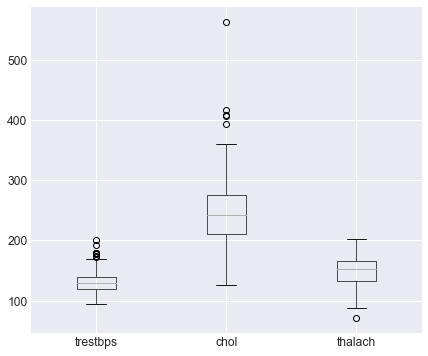

In [7]:
plt.clf();  # Clearing the current figure (to make sure we don't overlap with previous figure).
plt.figure(figsize=(7,6));

data[['trestbps','chol','thalach']].boxplot();  # Plotting the box plot
plt.show();

### Inter Quartile Range (IQR)
IQR is a measure of variability used to detect range of data and removie value outside this range as outliers. <br>This uses the values 
<img style="float: right;" alt="img not found" src="iqr.png" width=600 height=600>
- Q1 (mid value of data above median) 25% of data, 
- Q2 (median) 50% of data and 
- Q3 (middle value of data lower to median) 75% of data.

<br>to divide the ordered data into four equal parts. 
And the IQR is given by "Q3-Q1"

Below code demonstrates the processe of removing outliers by imlementing IQR to find outlier and removing them with help "~" symbol and printing old and new data shape.

In [8]:
print("Total no of rows before outlier removal:",data.shape)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Applying IQR formula and removing the outlier data
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]   
data.reset_index(inplace=True, drop=True)

print("After outlier removal:", data.shape)

Total no of rows before outlier removal: (297, 14)
After outlier removal: (212, 14)


The graph below shows the data free of outliers.

<Figure size 432x288 with 0 Axes>

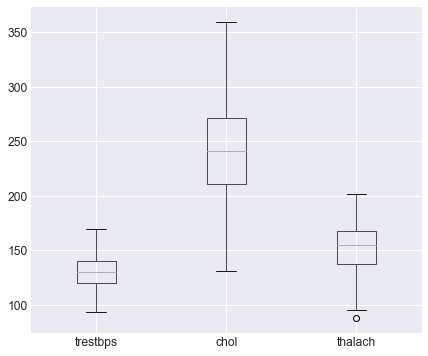

In [9]:
plt.clf()
plt.figure(figsize=(7,6))

data[['trestbps','chol','thalach']].boxplot() # Plotting the box plot
plt.show()

## 3. Feature engineering
<br> Feature engineering involves transforming raw data into relevant features with respect to the model we are creating. It should be **Informative, discriminative** and **non-redundant** which results in improvement in performance of model.<br><br>
The initial data set was expected to pridect 5 outcomes with **0** indicating "no disease" and **1,2,3,4** indicating 5 diffrent stages or kinds of heart disease. We modified our data to predict two out comes with just **0 and 1** predicting "no disease and disease". The reason being that we didn't have equal proporation of data for target labels **1,2,3,4** and model will be baised towards label **0**. So we can't build a sophisticated model with **unbalanced** data.
<br> We grouped the 4 diffrent disease predictions into 1 using **.groupby()** and gave two outputs showing diffrence after the changes are made.
<br>  <br> We also need to consider that if the data has more outcomes of one group the model may be **biased** towards it. To avoid this we have to **balanced** the data as much as possible. By grouping togather the diffrent catogories we managed to balance the data to maxium possibility

In [10]:
old_total_count = data.groupby(['num']).size() # Counting the target values

data.loc[data['num'] > 0,'num'] = 1  # Converting target variables greater than 0 to 1.

new_total_count = data.groupby(['num']).size() # Counting the target values

print(old_total_count,"\n")
new_total_count

num
0    121
1     42
2     20
3     22
4      7
dtype: int64 



num
0    121
1     91
dtype: int64

The code below plots the pie charts of groups before and after being modified. Though stratifying the data dint provide us with equal outcomes, the diffrence between **57.1%** and **42.9%** is still does not make a significant change in the working of the model and hence we dont need to create "synthetic data".

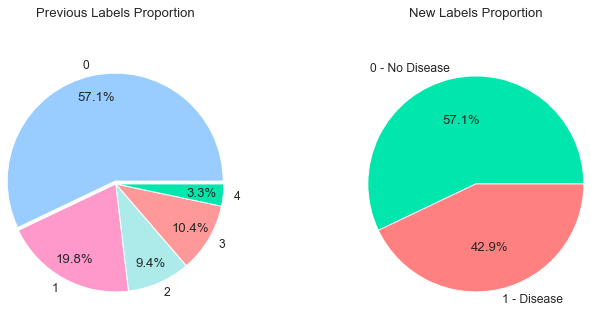

In [11]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
# Plotting pie chart before grouping target labels.
ax1.pie(old_total_count,explode = (0.04,0,0,0,0),labels=list(old_total_count.index),
    colors=['#99ccff','#ff99cc','#adebeb','#ff9999','#00e6ac'],autopct='%1.1f%%',
    radius=1.5,pctdistance=0.8,labeldistance=1.1
);

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
 # Plotting pie chart after aggregating target labels.
ax2.pie(new_total_count,labels=["0 - No Disease", "1 - Disease"],colors=["#00e6ac","#ff8080"],
                        autopct='%1.1f%%',radius=1.5,labeldistance=1.1
);

ax1.set_title('Previous Labels Proportion', y=1.4)
ax2.set_title('New Labels Proportion', y=1.4)
plt.show()

The **.describe()** method present the data with basics statistics, which helps us make understand data in a better way.

In [12]:
data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,53.306604,0.660377,3.316038,128.198113,243.924528,0.0,0.924528,150.745283,0.320755,0.914623,1.542453,0.471698,4.594340,0.429245
std,9.119291,0.474702,0.784402,14.958026,45.186543,0.0,0.994755,22.474445,0.467871,1.030770,0.586652,0.684390,1.926509,0.496140
min,29.000000,0.000000,2.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,45.750000,0.000000,3.000000,120.000000,210.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,241.500000,0.0,0.000000,155.000000,0.000000,0.600000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.500000,0.0,2.000000,168.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,76.000000,1.000000,4.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,3.000000,2.000000,7.000000,1.000000


### Removing useless data
By analysing the data shown above we observe that the column **"fbs"** has all zero values and not contributing towards model building. So we drop the column to avoid unnecessary wastage of computation and time.




In [13]:
data.drop('fbs',axis=1,inplace=True) # Removing "fbs" column from dataset.
data.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,53.306604,0.660377,3.316038,128.198113,243.924528,0.924528,150.745283,0.320755,0.914623,1.542453,0.471698,4.594340,0.429245
std,9.119291,0.474702,0.784402,14.958026,45.186543,0.994755,22.474445,0.467871,1.030770,0.586652,0.684390,1.926509,0.496140
min,29.000000,0.000000,2.000000,94.000000,131.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,45.750000,0.000000,3.000000,120.000000,210.750000,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,241.500000,0.000000,155.000000,0.000000,0.600000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.500000,2.000000,168.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,76.000000,1.000000,4.000000,170.000000,360.000000,2.000000,202.000000,1.000000,4.000000,3.000000,2.000000,7.000000,1.000000


With the help of **describe** method we came to know some data columns are numerical categorical and others are continuous numerical:
>- **Numerical Categorical** : 'sex','cp','restecg','exang','slope','ca','thal'
>- **Numerical Continuous** : 'age','trestbps','chol','thalach','oldpeak'

A brief visualization of data with **numerical categorical** values demostrating *No disease* and *disease* data points. We can see that most of data columns follows **binomial distribution** with two peaks each.

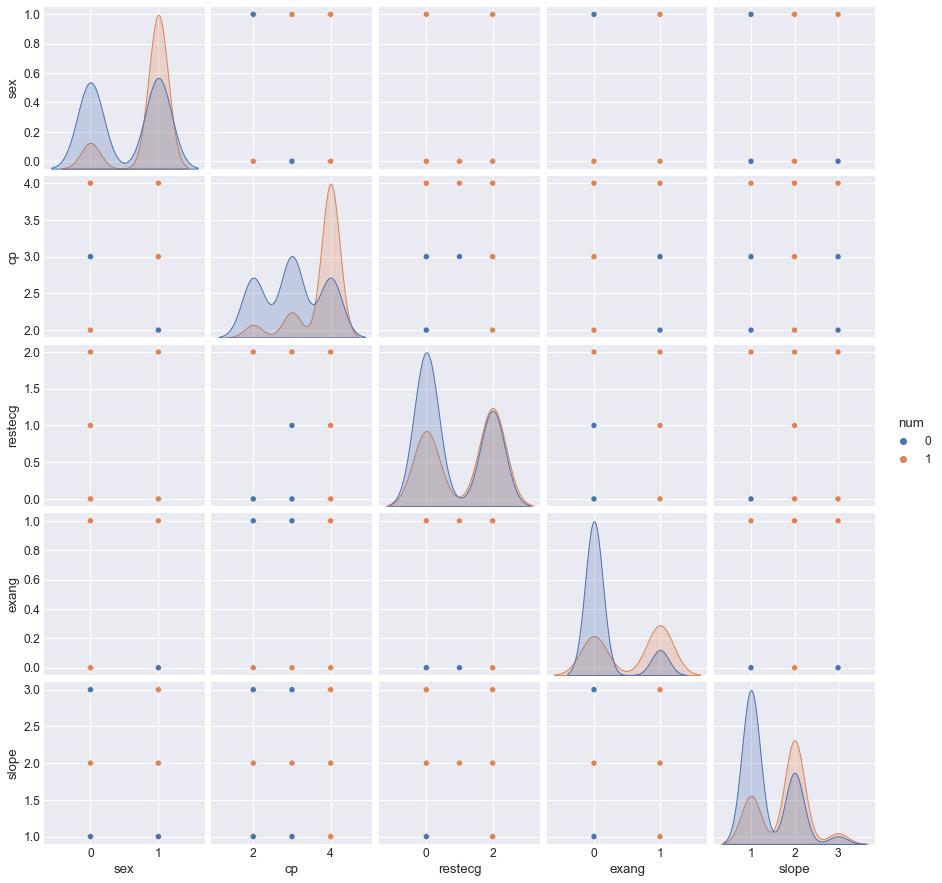

In [14]:
sb.pairplot(data[['sex','cp','restecg','exang','slope','num']],hue='num')
plt.show()

A brief visualization of data with **continous numerical** values demostrating *No disease* and *disease* data points. We can see that all of data columns follows **normal distribution** and *oldpeak* is bit have **positive skewness**.

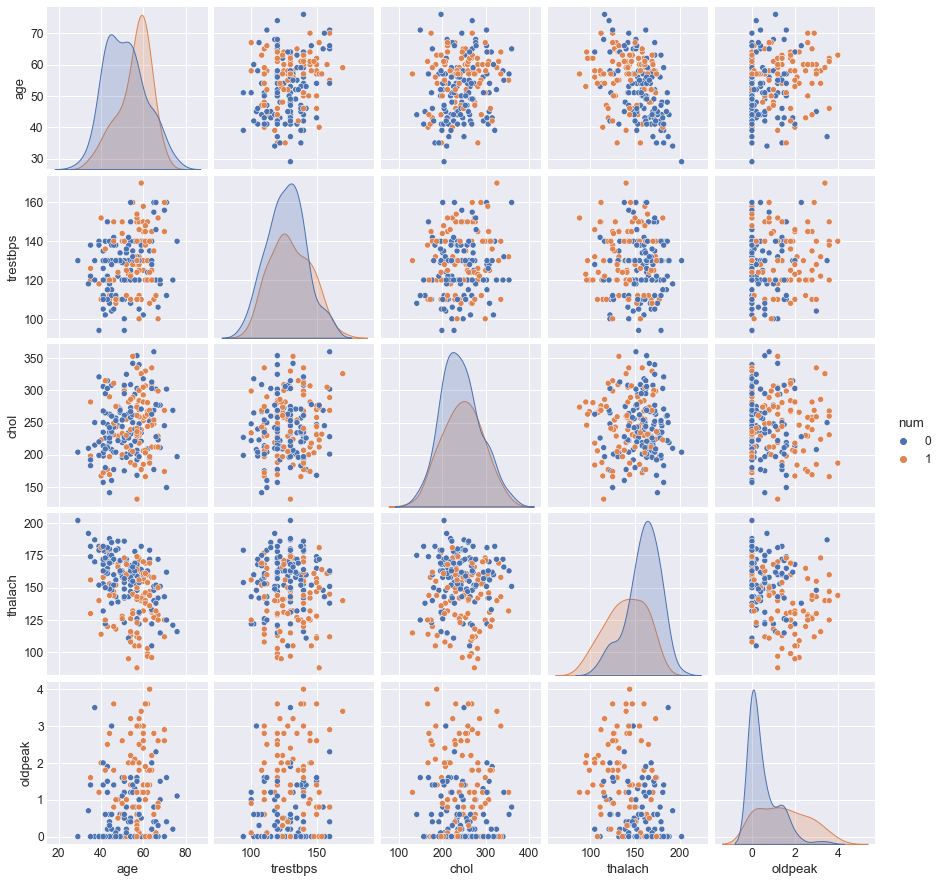

In [15]:
sb.pairplot(data[['age','trestbps','chol','thalach','oldpeak','num']],hue='num')
plt.show()

### Correlation matrix
Correlation matrix is used to visualize the correlation between pairs of variables at given data, to understand relationships between them and make decisions accordingly.<br>The variables are represented on rows and columns and the values are correlation co-efficients of these varibles. The value of correlation co-efficient can be anywhere between -1 to 1.<br>
> - If co-efficient value is near to -1 it means data has -ve correlation
> - If co-efficient value is near to 1 it means data has +ve correlation
> - If co-efficient value is near to 0 it means data has no correlation

In this correlation matrix we observe that the white values are the highest correlation as they are same variables. The second highest correlation in this data is between **"trestbps & age"**.

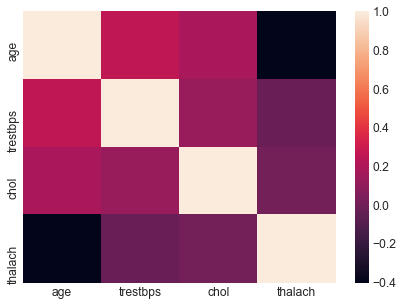

In [16]:
plt.figure(figsize=(7,5))
c_data = data[['age','trestbps','chol','thalach']]

corr = c_data.corr() # Calculating correlation matrix
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

### Regression plot to check correlation
We plot regression for "**Age & trestbps**" to check the correlation between the second highest correlations in our data. With the help of **Pearson's Correlation** test we came to know there is as such no correlation as values is closer to zero.

Correlation Coefficient:0.255


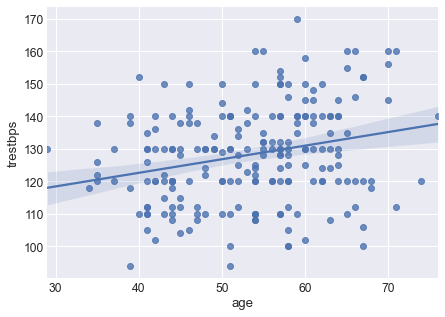

In [17]:
# Plotting regression for correlation between "age" and "trestbps".
plt.figure(figsize=(7,5))
sb.regplot(x='age',y='trestbps',data=data,scatter=True);  
# Calculating the Person's Correlation Coefficient
corr, _ = stats.pearsonr(data['age'], data['trestbps'])
print(f"Correlation Coefficient:{corr:.3f}")

Below code shows a standard histogram that tells us the distribution of the values in the column "age". We observe the heighest desnisty can be found between the age group of **50 to 60**.

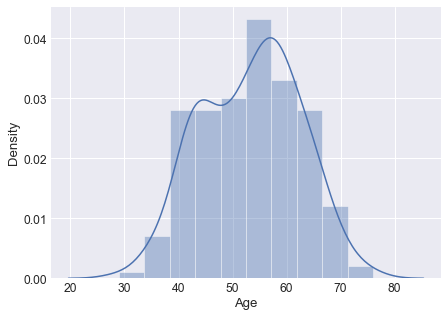

In [18]:
plt.figure(figsize=(7,5))
sb.distplot(x=data['age'], bins=10, axlabel="Age", kde=True) # plotting a histogram and distribution curve
plt.show()

## 4. Predictive Modeling
Modeling firsts involves the step of data modeling, which means to prepare data for our model's training and testing and applying algorithms to them. This can be done in both **Supervised** and **Unsupervised** process.<br><br>
According to our problem state, we will be using **supervised** learning to train our model. We first pop out the column **"num"** which is our **predicted/target variable**. Then we divide our data into **training** and **test set**. 
<br> To get the same train and test sets every time we split we use **"random_state** which helps us preserve the same splitting. We also used **stratify** to make sure train and test split set have same proportion for both classes. 
<br>Training Set: **80%**
<br>Testing Set: **20%**


In [19]:
y = data.pop('num') # Separating data labels from dataframe and stored in y variables
X = data            # Assigning feature to X variable

#Splitting training and testing data with test size 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, random_state=42, stratify=y)

print("Train data shape:",X_train.shape,"\nTrain labels:",y_train.shape)     
print("\nTest data shape:",X_test.shape,"\nTest labels:",y_test.shape)

Train data shape: (169, 12) 
Train labels: (169,)

Test data shape: (43, 12) 
Test labels: (43,)


### Selecting classifiers
We now select classifiers of our choice to train our data. We also need to normalized our data to bring them all on a lower scale to avoid dilution of effectiveness of important data.
<br> We selected these three classifiers
>- Logistic Regression
>- Decision Tree
>- Multi Layer Perceptron

We have created machine learning pipeline using **make_pipeline** for model training. First of all, continuous numerical data columns ('chol','trestbps','thalach') will be normalized with the help of **make_column_transformer** and remainging colmuns (numerical cateogorial) will pass through as it is and then the data will fed to the classifiers for patterns learning.

In [20]:
# Creating dictionary of classifier names with key values
model_dict={                                 
    0: "Logistic Regression",
    1: "Decision Tree",
    2: "Multilayer Perceptron"
}

# Initlaizing our model objects
lr = LogisticRegression(random_state=1, max_iter=100, solver='lbfgs')    # solver='saga'
dt = DecisionTreeClassifier(random_state=1, min_samples_split=13, criterion='entropy')  #internal node=features, branch=decision rule, leaf node=outcome
mlp = MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=250,               #min_samples_split=13
                           activation='tanh')               

# Initlaizing our MinMaxScaler object to bring data in range of 0 and 1
scaler = preprocessing.MinMaxScaler() 

#column tranformer help us to perform transfomations on specific columns
ct = make_column_transformer(                     
        (scaler, ['chol','trestbps','thalach']),
        remainder='passthrough'
)

#initializing different pipelines for three classifiers
pipeline_lr = make_pipeline(ct, lr)
pipeline_dt = make_pipeline(ct, dt)
pipeline_mlp = make_pipeline(ct, mlp)

pipelines = [pipeline_lr, pipeline_dt, pipeline_mlp]

# Training data with all three pipelines
for pipeline in pipelines:    
    pipeline.fit(X_train, y_train)

After the completion of training, we choose the model with the heighest accuracy. In this case, it was **Multilayer Perceptron"** which outperformed other defined accuracy metric.

In [21]:
# delacring variables to store best model parameters
best_acc, best_model, y_pred = 0.0, '', None

for i,model in enumerate(pipelines):
    pred = model.predict(X_test)                         # Predicting labels for test data 
    acc = accuracy_score(y_test, pred)*100               # Calculating accuracy score
    print(f"{model_dict[i]} Test Accuracy: {acc:.3f}")
    
    # saving best model parameters
    if acc > best_acc:
        best_acc = acc
        best_model = model_dict[i]
        y_pred = pred
        
print("-"*43)
print(f"Best Model: {best_model}\nTest Accuracy: {best_acc:.3f}")

Logistic Regression Test Accuracy: 83.721
Decision Tree Test Accuracy: 86.047
Multilayer Perceptron Test Accuracy: 83.721
-------------------------------------------
Best Model: Decision Tree
Test Accuracy: 86.047


### Confusion Matrix
Confusion matrix is a great way of demonstarting the outcome of a classifier. When we have two outcomes, confusion matrix shows the resul by plotting the data of predicted values with actual values.<br><br> Below matrix shows the correct predictions on black background and wrong predictions with white. Confusion matrix has the keywords <br>
<img style="float: right;" alt="img not found" src="con.jpg" width=400 height=400>
- True positive (Predected yes when actual was yes)
- True negative (Predected no when actual was no)
- False positive (Predected yes when actual was no)
- False negative (Predected no when actual was yes)



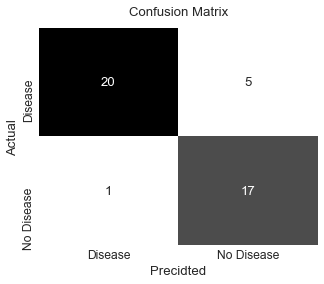

In [22]:
labels = ["Disease",'No Disease']
cf_matrix = confusion_matrix(y_test, y_pred)  # Calculating the confusion matrix.

plt.figure(figsize=(5,4))
ax = plt.axes()
sb.heatmap(cf_matrix, annot=True, cmap='gist_gray_r',         # ploting confusion matrix
           xticklabels=labels, yticklabels=labels, cbar=False,vmin=10);

ax.set_title('Confusion Matrix', y = 1.03)
plt.xlabel("Precidted")
plt.ylabel("Actual")
plt.show()

### ROC Metric 
ROC stands for Receiver Operating Characteristic. It shows false positive rate on the X axis, true positive rate on the Y axis. The ideal state is **false positive rate (FPR)** should be 0 and **true positive rate (TPR)** should be 1. It might seem unrealistic to expect, but the more **area under curve (AUC)** of ROC means better the classifier at prediction. AUC lies between 0 and 1, closer to 1 is better. This is another form of visualizing the classifier predicted outcome.

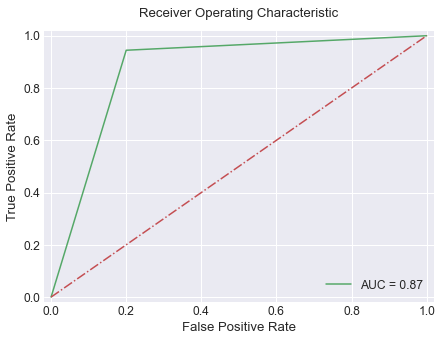

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred) # Calculating FPR and TPR rate
roc_auc = auc(fpr, tpr)                 # Calculating area under ROC curve

plt.figure(figsize=(7,5))
plt.title('Receiver Operating Characteristic', y = 1.03)
plt.plot(fpr, tpr, 'g', label = f'AUC = {roc_auc:0.2f}')  # Plot AUC.
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Thank you for your patience :)
# Any Questions?